In [1]:
import numpy as np
import pandas as pd
import json

import matplotlib.pyplot as plt
import seaborn as sns

# IMDB

In [2]:
df = pd.read_csv('imdb.csv')
df = df.drop_duplicates()
df = df[~((df.Rate == 'No Rate') | (df.Votes == 'No Votes'))]
df.Votes = df.Votes.str.replace(',', '').astype(int)
df.Rate = df.Rate.astype(float)
# df.Duration = df.Duration.fillna(np.nan).astype(int)
# df.Episodes = df.Episodes.str.replace('-', 1).fillna(1).astype(int)
df

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,107163,"Action, Adventure, Thriller",163,Film,PG-13,-,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,64375,"Crime, Drama, Thriller",90,Film,R,-,None,None,Severe,None,Moderate
2,The Many Saints of Newark,2021,6.4,27145,"Crime, Drama",120,Film,R,-,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,30443,"Action, Adventure, Sci-Fi",97,Film,PG-13,-,None,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,84636,"Action, Adventure, Drama",155,Film,PG-13,-,None,Moderate,None,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5023,The Human Centipede II (Full Sequence),2011,3.8,37492,Horror,91,Film,Not Rated,-,Severe,Severe,Severe,Mild,Severe
5024,Double Indemnity,1944,8.3,150448,"Crime, Drama, Film-Noir",107,Film,Passed,-,None,Mild,None,Mild,Mild
5025,Before the Devil Knows You're Dead,2007,7.3,100668,"Crime, Drama, Thriller",117,Film,R,-,Severe,Moderate,Severe,Severe,Severe
5026,Queen Bees,2021,6.0,887,"Comedy, Drama, Romance",100,Film,PG-13,-,None,None,Mild,Moderate,None


In [3]:
df[df.Date == 2021].sort_values('Votes', ascending=False)

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
18,Game of Thrones,2021,9.2,1885776,"Action, Adventure, Drama",57,Series,TV-MA,73,Severe,Severe,Severe,Moderate,Severe
52,Breaking Bad,2021,9.4,1593305,"Crime, Drama, Thriller",49,Series,TV-MA,62,Mild,Severe,Moderate,Severe,Severe
49,Stranger Things,2021,8.7,918729,"Drama, Fantasy, Horror",51,Series,TV-14,34,Mild,Moderate,Moderate,Mild,Moderate
10,The Walking Dead,2021,8.2,906327,"Drama, Horror, Thriller",44,Series,TV-14,177,Mild,Severe,Moderate,Mild,Severe
69,Friends,2021,8.8,903947,"Comedy, Romance",22,Series,TV-PG,235,Mild,None,Mild,Mild,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4949,The Last Inn,2021,2.7,70,"Drama, Fantasy, Horror",97,Film,TV-MA,-,Severe,No Rate,No Rate,No Rate,No Rate
4381,The Black Book,2021,3.3,69,Horror,75,Film,None,-,No Rate,No Rate,No Rate,No Rate,No Rate
4991,The Forgiven,2021,6.8,62,Drama,117,Film,None,-,No Rate,No Rate,No Rate,No Rate,No Rate
4367,The Survivor,2021,7.4,53,"Biography, Drama",129,Film,None,-,No Rate,No Rate,No Rate,No Rate,No Rate


In [4]:
# for year in sorted(df.Date.unique()):
#     print(year, '\n\t' + '\n\t'.join(df[((df.Date == year) & (df.Type == 'Film'))].sort_values('Votes', ascending=False).iloc[:5].Name.values), '\n')

In [5]:
genres = set(map(lambda x: x.strip(), ','.join(df.Genre.unique()).split(',')))
len(genres)

27

Genre popularity over years

In [6]:
res = []
for genre in genres:
    res.append(df[df.Genre.str.contains(genre)].groupby('Date', as_index=False).agg(rate=('Rate', 'mean')))
    res[- 1]['genre'] = genre
res = pd.concat(res)
res

,Date,rate,genre
0,1927,8.300000,Drama
1,1931,7.533333,Drama
2,1932,7.900000,Drama
3,1933,7.400000,Drama
4,1935,7.800000,Drama
...,...,...,...
15,2019,6.225000,Reality-TV
16,2020,8.500000,Reality-TV
17,2021,7.850000,Reality-TV
18,2022,8.400000,Reality-TV


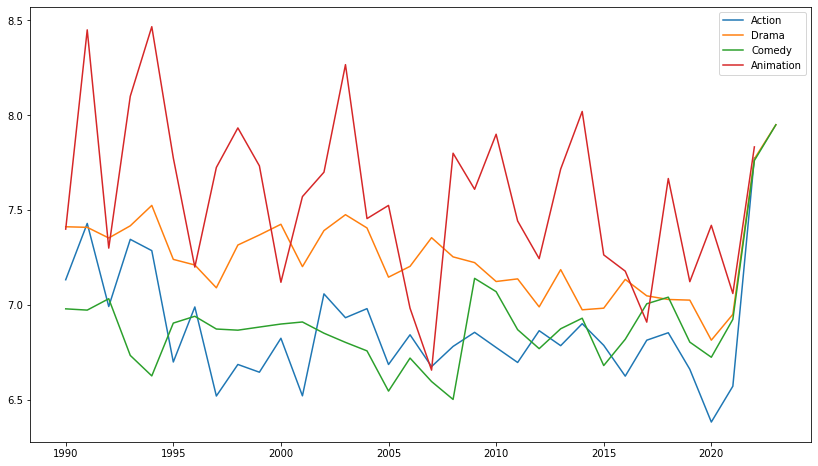

In [7]:
fig, ax = plt.subplots(figsize=(14, 8))
for genre in ('Action', 'Drama', 'Comedy', 'Animation'):#genres:
    data = res[(res.genre == genre) & (res.Date >= 1990)]
    ax.plot(data.Date, data.rate, label=genre)
ax.legend()

# TMDB

In [1]:
import numpy as np
import pandas as pd
import json

import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df = pd.read_csv('movies_metadata.csv', parse_dates=['release_date'])

df = df[df.status == 'Released']
df.drop(columns=['belongs_to_collection', 'homepage', 'imdb_id', 'id', 'overview', 'status', 'tagline', 'original_title', 'poster_path', 'video', 'adult'], inplace=True)
df.dropna(inplace=True)

df.budget = df.budget.astype(int)
df.popularity = df.popularity.astype(float)
df.drop(labels=df[df.release_date.isna() | (df.vote_count < 1) | (df.revenue < 1) | (df.budget < 1) | (df.genres.astype(bool) ^ 1)].index, inplace=True)

df['year'] = pd.DatetimeIndex(df.release_date).year
df = df[(df.year >= 1980) & (df.year <= 2016)]

decoder = {}
for col in ('genres', 'production_companies', 'production_countries', 'spoken_languages'):
    decoder[col] = {}
    new_col = []
    for arr in df[col]:
        try:
            arr = json.loads(arr.replace('\'', '\"'))
            if not arr:
                new_col.append([])
                continue
            id_key = [key for key in arr[0].keys() if key != 'name'][0]
            new_col_val = []
            for val in arr:
                new_col_val.append(val[id_key])
                if val[id_key] not in decoder[col]:
                    decoder[col][val[id_key]] = val['name']
            new_col.append(new_col_val)
        except:
            new_col.append([])
    df[col] = new_col

df

c:\Users\Владислав\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning:

Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.



,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,year
0,30000000,"[16, 35, 10751]",en,21.946943,[3],[US],1995-10-30,373554033.0,81.0,[en],Toy Story,7.7,5415.0,1995
1,65000000,"[12, 14, 10751]",en,17.015539,"[559, 2550, 10201]",[US],1995-12-15,262797249.0,104.0,"[en, fr]",Jumanji,6.9,2413.0,1995
3,16000000,"[35, 18, 10749]",en,3.859495,[306],[US],1995-12-22,81452156.0,127.0,[en],Waiting to Exhale,6.1,34.0,1995
5,60000000,"[28, 80, 18, 53]",en,17.924927,"[508, 675, 6194]",[US],1995-12-15,187436818.0,170.0,"[en, es]",Heat,7.7,1886.0,1995
8,35000000,"[28, 12, 53]",en,5.231580,"[33, 21437, 23770]",[US],1995-12-22,64350171.0,106.0,[en],Sudden Death,5.5,174.0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45250,12000000,"[28, 35, 18]",ta,1.323587,[16424],[IN],2007-06-14,19000000.0,185.0,"[ta, te]",Sivaji: The Boss,6.9,25.0,2007
45399,750000,"[80, 35]",ru,0.201582,"[42096, 42097]",[RU],2014-06-05,3.0,0.0,[ru],All at Once,6.0,4.0,2014
45409,800000,"[35, 18]",en,0.903061,[],[],2006-11-23,1328612.0,100.0,[ru],Savages,5.8,6.0,2006
45412,2000000,"[10749, 18]",en,0.121844,[21163],[RU],2010-09-30,1268793.0,107.0,[ru],Pro Lyuboff,4.0,3.0,2010


In [3]:
with open('col_decoder.json', 'w') as f:
    json.dump(decoder, f)
df.to_csv('movies_metadata_clean.csv', index=False)

In [4]:
langs = df.original_language.unique()
len(langs)

39

<AxesSubplot:title={'center':'number of films per year'}, xlabel='year'>

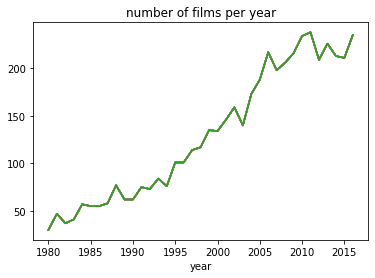

In [5]:
df.groupby('year').count().plot(legend=False, title='number of films per year')

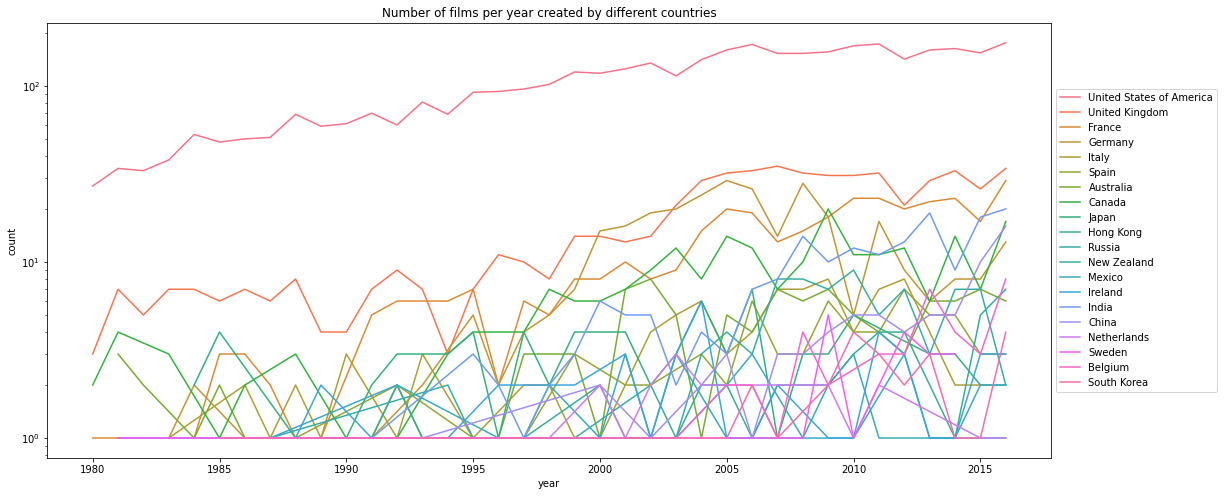

In [29]:
prod_countries_agg = []
for pd_id in decoder['production_countries'].keys():
    prod_countries_agg.append(df[df.production_countries.map(lambda x: pd_id in x)].groupby('year', as_index=False).agg(count=('title', 'count')))
    prod_countries_agg[- 1]['production_country'] = decoder['production_countries'][pd_id]
prod_countries_agg = pd.concat(prod_countries_agg, ignore_index=True)

top20_countries = prod_countries_agg.groupby('production_country', as_index=False).agg(count=('count', 'sum')).sort_values('count', ascending=False)\
    .production_country[:20]

plt.figure(figsize=(18, 8))
ax = sns.lineplot(data=prod_countries_agg[prod_countries_agg.production_country.isin(top20_countries)], x='year', y='count', hue='production_country')
ax.set(yscale="log")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Number of films per year created by different countries')
plt.show()

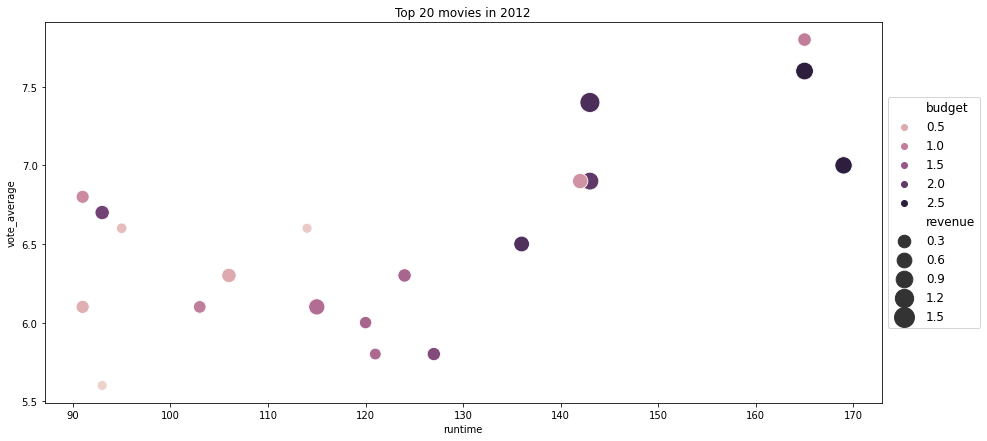

In [105]:
year = 2012

top_movies = df[df.year == year].sort_values('popularity', ascending=False)[:20]
plt.figure(figsize=(15, 7))
sns.scatterplot(data=top_movies, x='runtime', y='vote_average', hue='budget', size='revenue', sizes=(100, 400))\
    .legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='large')
# for i, row in top_movies.iterrows():
#     plt.text(row.runtime - (len(row.title) // 3), row.vote_average + 0.1, row.title)
plt.title(f"Top 20 movies in {year}")
plt.show()

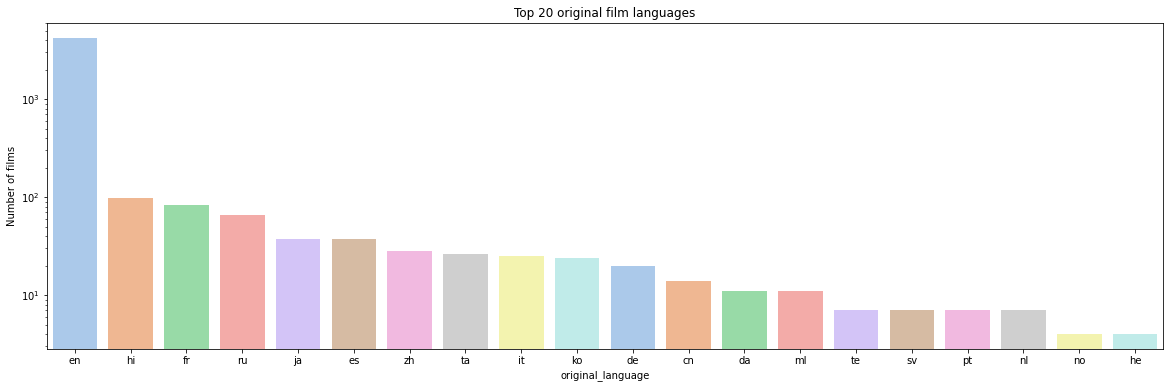

In [48]:
lang_agg = df.groupby('original_language', as_index=False).agg(count=('release_date', 'count')).sort_values('count', ascending=False)
# lang_agg['original_language'] = lang_agg['original_language'].map(lambda x: decoder['spoken_languages'].get(x, x))

plt.figure(figsize=(20, 6))
ax = sns.barplot(data=lang_agg[:20], x='original_language', y='count', log=True, palette='pastel')
ax.set_ylabel('Number of films')
ax.set_title('Top 20 original film languages')
plt.show()

Text(0.5, 1.0, "Films's rating density by year")

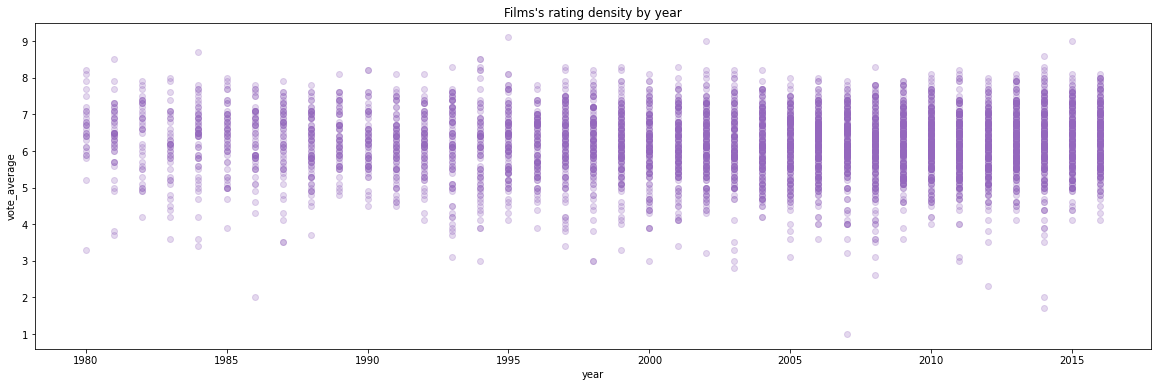

In [7]:
plt.figure(figsize=(20, 6))
sns.regplot(data=df, x='year', y='vote_average', scatter_kws={'alpha': 0.25}, fit_reg=False, color=sns.color_palette()[4])
plt.title('Films\'s rating density by year')

Wordcloud for titles by genres

In [8]:
decoder['genres'].items()

dict_items([(16, 'Animation'), (35, 'Comedy'), (10751, 'Family'), (12, 'Adventure'), (14, 'Fantasy'), (18, 'Drama'), (10749, 'Romance'), (28, 'Action'), (80, 'Crime'), (53, 'Thriller'), (36, 'History'), (878, 'Science Fiction'), (9648, 'Mystery'), (27, 'Horror'), (10752, 'War'), (10769, 'Foreign'), (99, 'Documentary'), (37, 'Western'), (10402, 'Music'), (10770, 'TV Movie')])

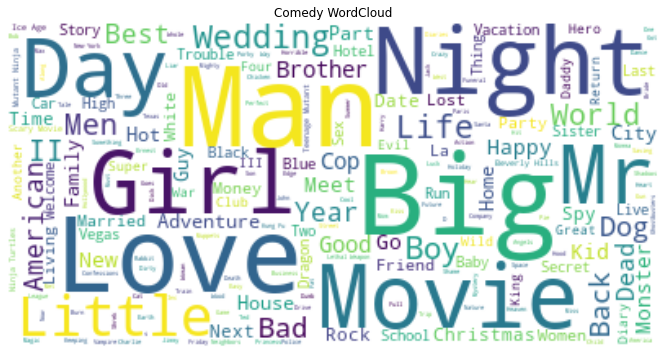

In [9]:
from wordcloud import WordCloud

genre_id = 35
wc = WordCloud(background_color='white').generate(' '.join(df[df.genres.map(lambda x: genre_id in x)].title))
plt.figure(figsize=(20, 6))
plt.imshow(wc, interpolation="bilinear")
plt.title(f"{decoder['genres'][genre_id]} WordCloud")
plt.axis("off")
plt.show()

Genres popularity

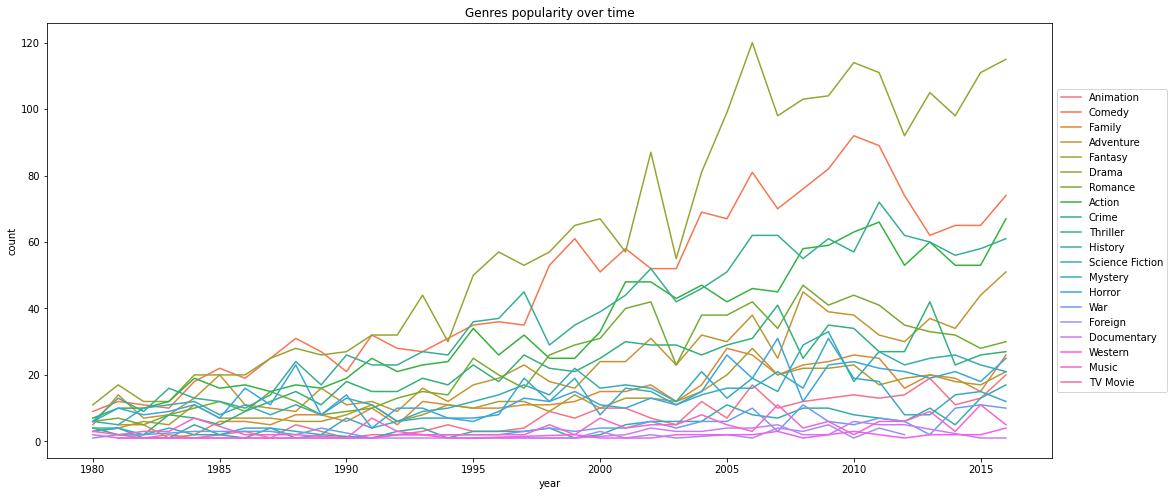

In [10]:
genres_agg = []
for genre_id in decoder['genres'].keys():
    genres_agg.append(df[df.genres.map(lambda x: genre_id in x)].groupby('year', as_index=False).agg(count=('title', 'count')))
    genres_agg[- 1]['genre'] = decoder['genres'][genre_id]
genres_agg = pd.concat(genres_agg, ignore_index=True)

plt.figure(figsize=(18, 8))
plt.title('Genres popularity over time')
sns.lineplot(data=genres_agg, x=genres_agg.year, y=genres_agg['count'], hue=genres_agg.genre).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [88]:
import plotly.express as px
import plotly.graph_objects as go

In [12]:
br_agg = df.groupby('year', as_index=False).agg(budget=('budget', 'mean'), revenue=('revenue', 'mean'))

fig = go.Figure()
fig.add_trace(go.Bar(
    x=br_agg['year'],
    y=-br_agg['budget'],
    name='costs (budget)'
))
fig.add_trace(go.Bar(
    x=br_agg['year'],
    y=br_agg['revenue'],
    name='revenue'
))

fig.update_layout(barmode='relative', title_text='Costs and Revenue over years')
fig.show()

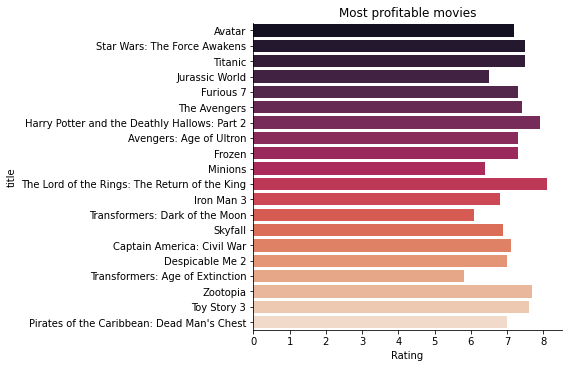

In [185]:
profit = (df.revenue - df.budget).sort_values(ascending=False)

sns.catplot(data=df.loc[profit[:20].index], x='vote_average', y='title', kind='bar', orient='h', palette='rocket', aspect=1.6)
plt.title('Most profitable movies')
plt.xlabel('Rating')
plt.show()

In [126]:
year = 2010

prod_comp_agg = []
for pc_id in decoder['production_companies'].keys():
    temp = df[df.year == year]
    temp = temp[temp.production_companies.map(lambda x: pc_id in x)]
    prod_comp_agg.append(temp.groupby('year', as_index=False)\
        .agg(rating=('vote_average', 'mean'), count=('title', 'count'), revenue=('revenue', 'mean'), budget=('budget', 'mean')))
    prod_comp_agg[- 1]['production_company'] = decoder['production_companies'][pc_id]
prod_comp_agg = pd.concat(prod_comp_agg, ignore_index=True)
prod_comp_agg

,year,rating,count,revenue,budget,production_company
0,2010,7.600000,1,1.066970e+09,2.000000e+08,Pixar Animation Studios
1,2010,6.100000,1,2.308173e+07,2.400000e+07,TriStar Pictures
2,2010,5.750000,8,1.676725e+08,8.175000e+07,Twentieth Century Fox Film Corporation
3,2010,5.566667,3,1.484328e+08,5.566667e+07,Regency Enterprises
4,2010,6.292857,14,2.025530e+08,7.019643e+07,Warner Bros.
...,...,...,...,...,...,...
522,2010,5.900000,1,1.980000e+02,5.000000e+05,Hypnopolis
523,2010,5.300000,1,1.047400e+04,1.350000e+05,logan films
524,2010,5.300000,1,1.047400e+04,1.350000e+05,Real Bean Entertainment
525,2010,5.300000,1,1.047400e+04,1.350000e+05,Avilon Audio


In [187]:
prod_comp_agg1 = []
for pc_id in decoder['production_companies'].keys():
    temp = df
    temp = temp[temp.production_companies.map(lambda x: pc_id in x)]
    prod_comp_agg1.append(temp.groupby('year', as_index=False)\
        .agg(count=('title', 'count')))
    prod_comp_agg1[- 1]['production_company'] = decoder['production_companies'][pc_id]
prod_comp_agg1 = pd.concat(prod_comp_agg1, ignore_index=True)
prod_comp_agg1

,year,count,production_company
0,1995,1,Pixar Animation Studios
1,1998,1,Pixar Animation Studios
2,1999,1,Pixar Animation Studios
3,2001,1,Pixar Animation Studios
4,2003,1,Pixar Animation Studios
...,...,...,...
9871,1999,1,S Pictures
9872,2015,1,Corner Work
9873,2005,1,Talent House
9874,2014,1,Кинокомпания «Lunapark»


In [191]:
top20_companies = prod_comp_agg1.groupby('production_company', as_index=False).agg(count=('count', 'sum')).sort_values('count', ascending=False)\
    [:20].production_company

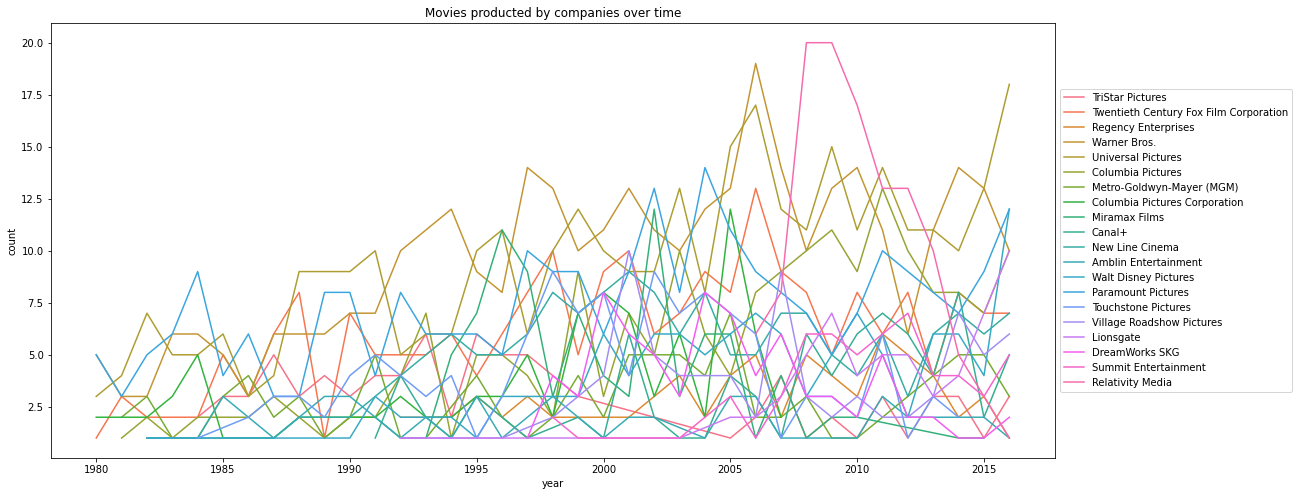

In [193]:
plt.figure(figsize=(18, 8))
plt.title('Movies producted by companies over time')
sns.lineplot(data=prod_comp_agg1[prod_comp_agg1.production_company.isin(top20_companies)],\
     x='year', y='count', hue='production_company').legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

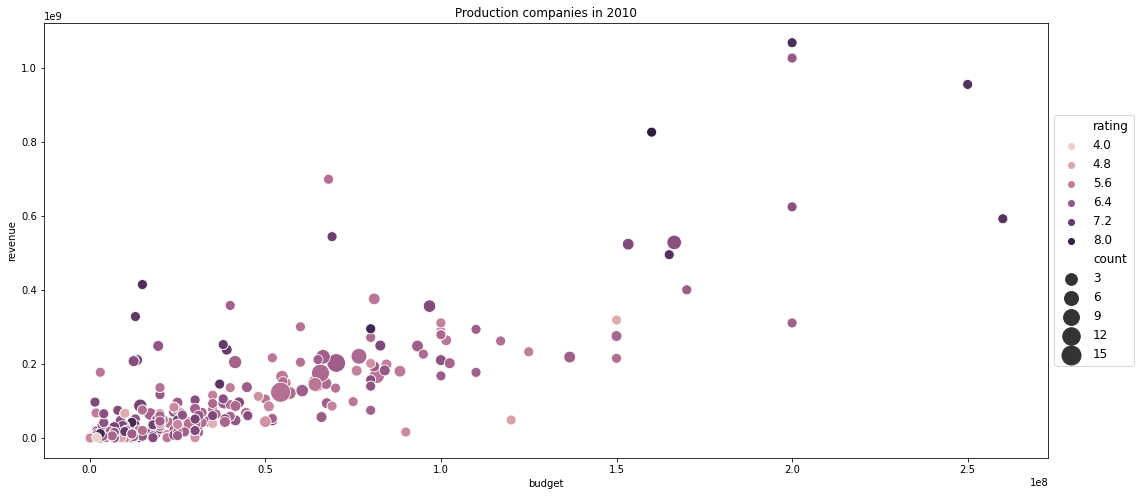

In [125]:
plt.figure(figsize=(18, 8))
ax = sns.scatterplot(data=prod_comp_agg, x='budget', y='revenue', size='count', hue='rating', sizes=(100, 400))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='large')
# ax.set_yscale('log')
# ax.set_xscale('log')
plt.title(f"Production companies in {year}")
plt.show()

In [132]:
year = 2010

spoken_lang_agg = []
for sl_id in decoder['spoken_languages'].keys():
    spoken_lang_agg.append(df[df.spoken_languages.map(lambda x: sl_id in x)].groupby('year', as_index=False)\
        .agg(rating=('vote_average', 'mean'), count=('title', 'count'), revenue=('revenue', 'mean'), budget=('budget', 'mean')))
    spoken_lang_agg[- 1]['spoken_language'] = decoder['spoken_languages'][sl_id]
spoken_lang_agg = pd.concat(spoken_lang_agg, ignore_index=True)
spoken_lang_agg

,year,rating,count,revenue,budget,spoken_language
0,1980,6.593333,30,5.246876e+07,1.288500e+07,English
1,1981,6.420000,45,4.044533e+07,1.043444e+07,English
2,1982,6.424324,37,6.885265e+07,1.294730e+07,English
3,1983,6.107500,40,5.196413e+07,1.374742e+07,English
4,1984,6.341818,55,4.984196e+07,1.348722e+07,English
...,...,...,...,...,...,...
850,2011,5.800000,1,1.747900e+04,2.000000e+07,ქართული
851,2012,6.800000,1,7.771244e+07,3.000000e+06,
852,2014,6.100000,1,5.290761e+08,1.600000e+08,
853,2013,6.800000,1,1.700000e+05,7.900000e+04,?????


In [142]:
top20_spoken_langs = spoken_lang_agg.groupby('spoken_language', as_index=False).agg(count=('count', 'sum')).sort_values('count', ascending=False)\
    .spoken_language[:20]

c:\Users\Владислав\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 24191 (\N{CJK UNIFIED IDEOGRAPH-5E7F}) missing from current font.

c:\Users\Владислав\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 24030 (\N{CJK UNIFIED IDEOGRAPH-5DDE}) missing from current font.

c:\Users\Владислав\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 35805 (\N{CJK UNIFIED IDEOGRAPH-8BDD}) missing from current font.

c:\Users\Владислав\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 24291 (\N{CJK UNIFIED IDEOGRAPH-5EE3}) missing from current font.

c:\Users\Владислав\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 35441 (\N{CJK UNIFIED IDEOGRAPH-8A71}) missing from current font.

c:\Users\Владислав\AppDat

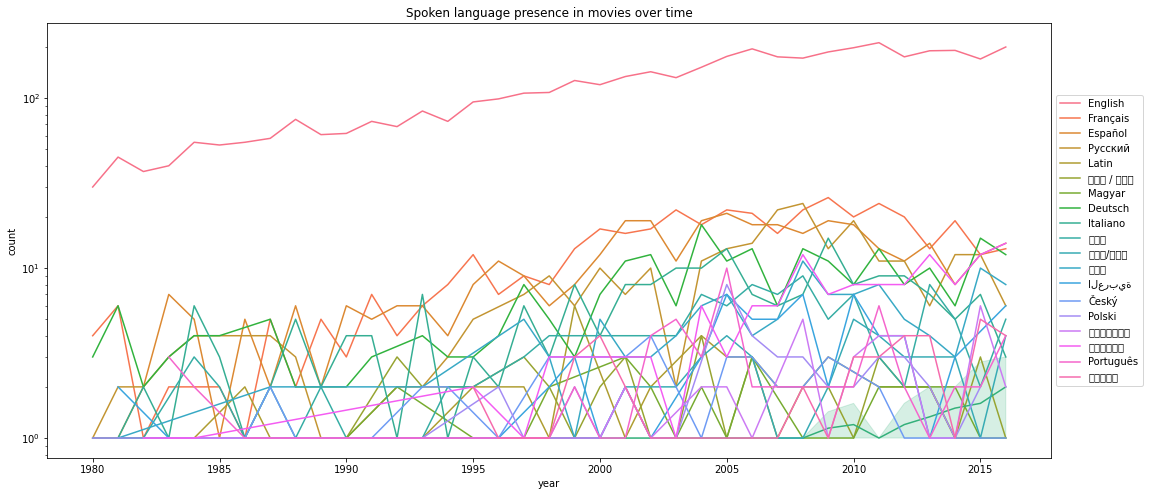

In [145]:
plt.figure(figsize=(18, 8))
plt.title('Spoken language presence in movies over time')
ax = sns.lineplot(data=spoken_lang_agg[spoken_lang_agg.spoken_language.isin(top20_spoken_langs)], x='year', y='count', hue='spoken_language')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(yscale='log')
plt.show()